C:\Users\torre\AppData\Local\Temp\ipykernel_183836\1161165538.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY", start="2019-09-19", end="2025-09-19")['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\torre\AppData\Local\Temp\ipykernel_183836\1161165538.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd = (yf.download("DX-Y.NYB", start=spy.index.min())['Close'].pct_change() + 1).cumprod()
[*********************100%***********************]  1 of 1 completed


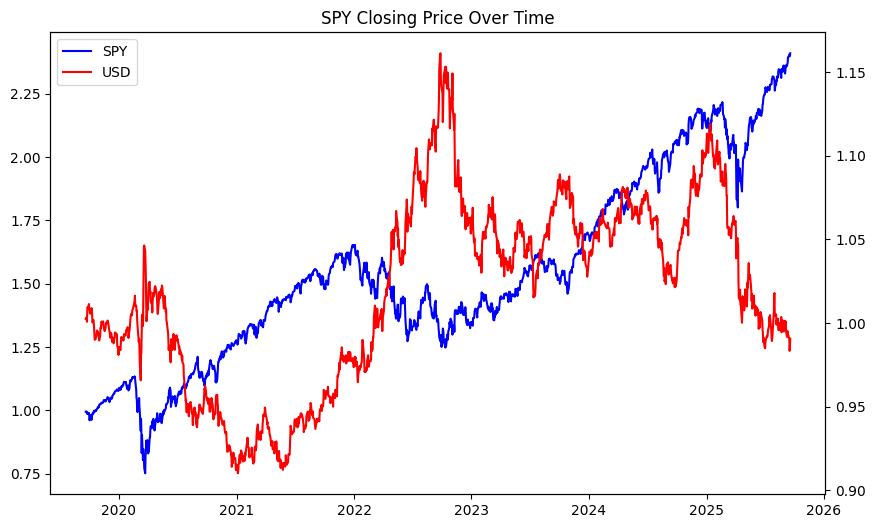

In [14]:
# Dashboard with equity (SPY), forex (USD), commodities (Gold, crude oil, wheat), bonds (Inflation-linked bonds).
# Data about growth, inflation, volatility, and yield.
# Data goes back as far as possible, with widget slider to choose time frame.

# import streamlit as st 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Getting the data for SPY (daily)
# Closing prices only
data = yf.download("SPY", start="2019-09-19", end="2025-09-19")['Close']
data.to_csv("spy_data.csv")

spy = (pd.read_csv("spy_data.csv", index_col=0, parse_dates=True)['SPY'].pct_change() + 1).cumprod()

# # Check for missing values
# missing_values = data.isnull().sum() # number is zero, no missing values

# Plot the data
fig, ax1=plt.subplots(figsize=(10,6))
ax2=ax1.twinx()
plt.title("SPY Closing Price Over Time")
#plt.yscale('log')

# forex using USD index
usd = (yf.download("DX-Y.NYB", start=spy.index.min())['Close'].pct_change() + 1).cumprod()
common_index = spy.index.intersection(usd.index)
ax1.plot(common_index, spy.loc[common_index], label='SPY', color='blue')
ax2.plot(common_index, usd.loc[common_index], label='USD', color='red')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
plt.show()
